    N   P   K  temperature   humidity        ph    rainfall  crop
0  90  42  43    20.879744  82.002744  6.502985  202.935536  Rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  Rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  Rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  Rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  Rice
        N   P   K  temperature   humidity        ph    rainfall    crop
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  Coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  Coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  Coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  Coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  Coffee
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')
['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'B

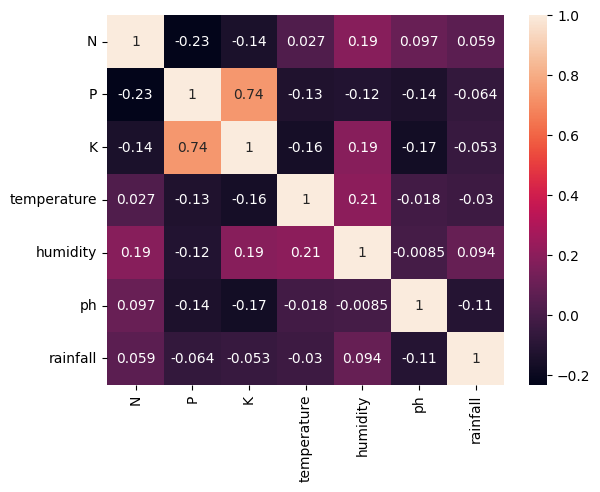

Model: Decision Tree
Accuracy: 0.9795454545454545
Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
   Blackgram       0.93      0.88      0.90        16
    ChickPea       1.00      1.00      1.00        21
     Coconut       1.00      1.00      1.00        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.90      0.96      0.93        28
 KidneyBeans       1.00      1.00      1.00        14
      Lentil       0.91      0.91      0.91        23
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
   MothBeans       0.90      0.95      0.92        19
    MungBean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      O

In [2]:
# Import libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')


def read_input(data_path):
    """
    Reads input CSV file and returns the dataframe.
    :param data_path: Path to the CSV file
    :return: Pandas dataframe
    """
    df = pd.read_csv("D:/PMC project/crop IT/Data/Crop_recommendation.csv")
    return df


def print_data_insights(df):
    """
    Prints basic data insights such as head, tail, columns, and unique crop values.
    :param df: Pandas dataframe
    """
    print(df.head())
    print(df.tail())
    print(df.columns)
    print(df['crop'].unique())


def crop_counts(df):
    """
    Prints the value counts of the 'crop' column.
    :param df: Pandas dataframe
    """
    print(df['crop'].value_counts())


def heatmap_vis(df):
    """
    Plots a heatmap of correlation between numeric features.
    :param df: Pandas dataframe
    """
    # Drop non-numeric columns (like 'crop')
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Plot the correlation heatmap for numeric features only
    sns.heatmap(numeric_df.corr(), annot=True)
    plt.show()



def separate_feature_labels(df):
    """
    Separates features and target labels.
    :param df: Pandas dataframe
    :return: features (X), target labels (y)
    """
    features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    target = df['crop']
    return features, target


def split_train_test_dataset(features, target, test_size=0.2, random_state=2):
    """
    Splits the data into training and testing datasets.
    :param features: Features for model training
    :param target: Target labels
    :param test_size: Size of the test data (default 0.2)
    :param random_state: Random state for reproducibility (default 2)
    :return: Splitted train-test data (Xtrain, Xtest, Ytrain, Ytest)
    """
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=test_size, random_state=random_state)
    return Xtrain, Xtest, Ytrain, Ytest


# Preprocessing function
def preprocess_data(features):
    """
    Preprocess data by scaling.
    :param features: The input features.
    :return: Scaled features
    """
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    return scaled_features


# Train multiple models and evaluate
def train_and_evaluate(X_train, X_test, y_train, y_test):
    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC()
    }

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Evaluate the model
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
        print("-" * 60)


# Main function to run the smart farming project
def main():
    # File path to your dataset
    data_path = "D:/PMC project/crop IT/Data/Crop_recommendation.csv"

    # Read the dataset
    df = read_input(data_path)

    # Show data insights
    print_data_insights(df)

    # Separate features and target
    features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    target = df['crop']

    # Preprocess data (Standardize)
    features = preprocess_data(features)

    # Split the data
    X_train, X_test, y_train, y_test = split_train_test_dataset(features, target, test_size=0.2, random_state=2)

    # Plot correlation heatmap
    heatmap_vis(df)

    # Train models and evaluate performance
    train_and_evaluate(X_train, X_test, y_train, y_test)


if __name__ == "__main__":
    main()


In [4]:
# Import necessary libraries
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Load your dataset (Make sure you have the correct path to your dataset)
# Assuming your dataset is saved in CSV format and contains 7 features like N, P, K, temperature, etc.
df = pd.read_csv('D:/PMC project/crop IT/Data/Crop_recommendation.csv')

# 2. Separate the features and target
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # 7 features
y = df['crop']  # Target column

# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the model
model = RandomForestClassifier()

# 5. Train the model
model.fit(X_train, y_train)

# 6. Ensure the 'models' directory exists
if not os.path.exists('models'):
    os.makedirs('models')

# 7. Save the trained model to a .pkl file
model_filename = 'RandomForestClassifier.pkl'
joblib.dump(model, model_filename)

print(f"Model saved successfully at {model_filename}")


Model saved successfully at DecisionTreeClassifier.pkl
